In [9]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [10]:

df = pd.read_stata('../Downloads/ID_GPS_Amended.dta',convert_categoricals =False)
df.head()

,region,zone,woreda,kebele,hhid,gps_readinglatitude,gps_readinglongitude,gps_readingaltitude,gps_readingaccuracy,hhsize
0,1,101,10101,10101001,1.010100e+09,14.724167,37.803680,660.748169,15.0,6
1,1,101,10101,10101001,1.010100e+09,14.728558,37.803696,1069.501709,10.0,3
2,1,101,10101,10101001,1.010100e+09,14.728428,37.803204,1061.236938,15.0,3
3,1,101,10101,10101001,1.010100e+09,14.723778,37.804642,1066.527954,15.0,3
4,1,101,10101,10101001,1.010100e+09,14.729754,37.803078,1064.873413,10.0,3


In [18]:
df['Coordinates'] = list(zip(df.gps_readinglongitude, df.gps_readinglatitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')
gdf.crs = {'init': 'epsg:4326', 'no_defs': True}
gdf.head()

,region,zone,woreda,kebele,hhid,gps_readinglatitude,gps_readinglongitude,gps_readingaltitude,gps_readingaccuracy,hhsize,Coordinates
0,1,101,10101,10101001,1.010100e+09,14.724167,37.803680,660.748169,15.0,6,POINT (37.80368041992188 14.72416687011719)
1,1,101,10101,10101001,1.010100e+09,14.728558,37.803696,1069.501709,10.0,3,POINT (37.80369567871094 14.72855758666992)
2,1,101,10101,10101001,1.010100e+09,14.728428,37.803204,1061.236938,15.0,3,POINT (37.80320358276367 14.72842788696289)
3,1,101,10101,10101001,1.010100e+09,14.723778,37.804642,1066.527954,15.0,3,POINT (37.80464172363281 14.72377777099609)
4,1,101,10101,10101001,1.010100e+09,14.729754,37.803078,1064.873413,10.0,3,POINT (37.80307769775391 14.72975444793701)


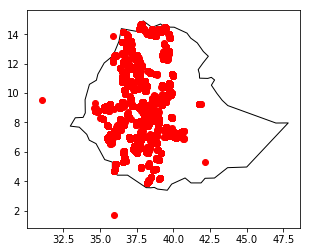

In [19]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.name == 'Ethiopia'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

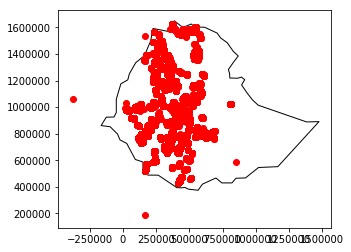

In [22]:
gdf = gdf.to_crs({'init': 'epsg:32637'}) #+proj=utm +zone=37 +datum=WGS84 +units=m +no_defs  


world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')).to_crs({'init': 'epsg:32637'})

# We restrict to South America.
ax = world[world.name == 'Ethiopia'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

In [39]:
gdf['x_coord'] = gdf.Coordinates.x
gdf['y_coord'] = gdf.Coordinates.y
gdf.drop(['Coordinates'], inplace=True, axis=1)
gdf.head()


,region,zone,woreda,kebele,hhid,gps_readinglatitude,gps_readinglongitude,gps_readingaltitude,gps_readingaccuracy,hhsize,x_coord,y_coord
0,1,101,10101,10101001,1.010100e+09,14.724167,37.803680,660.748169,15.0,6,371215.120887,1.628160e+06
1,1,101,10101,10101001,1.010100e+09,14.728558,37.803696,1069.501709,10.0,3,371219.342085,1.628645e+06
2,1,101,10101,10101001,1.010100e+09,14.728428,37.803204,1061.236938,15.0,3,371166.285615,1.628631e+06
3,1,101,10101,10101001,1.010100e+09,14.723778,37.804642,1066.527954,15.0,3,371318.390993,1.628116e+06
4,1,101,10101,10101001,1.010100e+09,14.729754,37.803078,1064.873413,10.0,3,371153.512057,1.628778e+06


In [40]:
gdf.to_csv('./james_data.csv')
